## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sortedcontainers import SortedDict
import matplotlib.pyplot as plt

## Printing
Those functions were used to view data, textual and graphic, and were essential to debbugging and writing the algorithms below

In [169]:
def PrintSortDict(sd):
    for k in sd.keys():
        print(f"X:{k}; Y:{sd[k]}")

def PrintKeys(sd):
    for k in sd.keys():
        print(f"{k}; ")

def PrintScope(sd):
    for k in sd.keys():
        print(f"Vizinhos de {k.id}: ")
        for kk in sd[k].keys():
            print(f"{kk.id}: {sd[k][kk]}")

In [226]:
def PrintHullA(polar_hull):
    x = []
    y = []
    for key in polar_hull.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, marker='o', color='b')

def PrintSets(set1, set2):
    x = []
    y = []
    for key in set1.keys():
        x.append(key.p.x)
        y.append(key.p.y)
    plt.scatter(x,y,marker='o',color='b')
    x = []
    y = []
    for key in set2.keys():
        x.append(key.p.x)
        y.append(key.p.y)
    plt.scatter(x,y,marker='x',color='r')

def PrintPoints(rb):
    x = []
    y = []
    for k in rb.keys():
        x.append(k.x)
        y.append(k.y)
    plt.scatter(x,y)

def PrintHulls(ph_one, ph_two):
    fig, ax = plt.subplots()
    x = []
    y = []
    for key in ph_one.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='b')
    x = []
    y = []
    for key in ph_two.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='r')
    
def PrintHullsAndSeparator(ph_one,ph_two,sep):
    fig, ax = plt.subplots()
    x = []
    y = []
    for key in ph_one.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='b')
    x = []
    y = []
    for key in ph_two.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='r')
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    ax.set_ylim(y_limits)
    slope, inter = sep
    x = x_limits
    y = []
    y.append(slope*x[0]+inter)
    y.append(slope*x[1]+inter)
    ax.plot(x,y,color='g')
    

def PrintHullsAndPoints(ph_one,ph_two,set1,set2):
    fig, ax = plt.subplots()
    x = []
    y = []
    for key in ph_one.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='b')
    x = []
    y = []
    for key in ph_two.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='r')
    x = []
    y = []
    for key in set1.keys():
        x.append(key)
        y.append(set1[key])
    plt.scatter(x,y,marker='o',color='b')
    x = []
    y = []
    for key in set2.keys():
        x.append(key)
        y.append(set2[key])
    plt.scatter(x,y,marker='x',color='r')

def PrintHullAndPoint(ph_one,set1):
    fig, ax = plt.subplots()
    x = []
    y = []
    for key in ph_one.keys():
        x.append(key.x)
        y.append(key.y)
    x.append(x[0])
    y.append(y[0])
    ax.plot(x, y, marker='o', color='b')
    x = []
    y = []
    for p in set1:
        x.append(p[0])
        y.append(p[1])
    plt.scatter(x,y,marker='o',color='b')
    

## Classes

In [99]:
class Point:
    id = 1
    def __init__(self,a,b, c = 0, shake=1e-5):
        self.id = Point.id
        Point.id+=1
        shakes = np.random.uniform(-shake, shake, 2)
        self.x = a+shakes[0]
        self.y = b+shakes[1]
        self.classe = c

    def __add__(self, other):
        if isinstance(other, Point):
            return Point(self.x+other.x, self.y+other.y)
        elif isinstance(other, np.ndarray):
            return Point(self.x+other[0],self.y+other[1],shake=0)
        else:
            raise TypeError("Unsupported operand type")
        
    def __sub__(self, other):
        if isinstance(other, Point):
            return Point(self.x-other.x, self.y-other.y)
        else:
            raise TypeError("Unsupported operand type")
        
    def __truediv__(self,other):
        return Point(self.x/other,self.y/other)
        
    def __str__(self):
        return str(self.id)+": "+str(self.x)+"   "+str(self.y)
    

    def __lt__(self,other):
        if isinstance(other, Point):
            vec_prod = (self.x*other.y)-(self.y*other.x)
            if vec_prod>0:
                return True
            elif vec_prod<0 or (self.x==other.x and self.y==other.y):
                return False            
            else:
                raise Exception(f"Segments ending in {self} and {other} are parallel")
        else:
            raise TypeError("Unsupported operand type")
        
    
        
    def Shake(self,shake):
        shakes = np.random.uniform(-shake,shake,2)
        self.x+=shakes[0]
        self.y+=shakes[1]
        return self

    def Reset():
        Point.id = 1

In [155]:
class PointX:
    id = 1
    def __init__(self,x, y):
        self.x = x
        self.y = y
        self.id = PointX.id
        PointX.id+=1

    def Reset():
        PointX.id = 1
    
    def __lt__(self,other):
        if isinstance(other, PointX):
            return self.x < other.x
        raise TypeError("Unsupported operand type")
        

In [5]:
class Segment:
    id = 1
    def __init__(self,a: Point, b: Point, enforce_order=True, shake = 0):
        if b.x<a.x and enforce_order:
            temp = a
            a = b
            b = temp
        self.bgn = a.Shake(shake)
        self.end = b.Shake(shake)
        self.slope = (self.end.y-self.bgn.y)/(self.end.x-self.bgn.x)
        self.intercept = self.end.y - (self.slope * self.end.x)
        self.id = Segment.id
        Segment.id+=1
        
    
    def Y_At_X(self,x):
        return self.slope*x+self.intercept


    def Invert(self):
        temp = self.bgn
        self.bgn = self.end
        self.end = temp


    def __str__(self):
        return "Id: "+str(self.id)+"\nBegin: "+str(self.bgn.x)+"   "+str(self.bgn.y)+"\nEnd: "+str(self.end.x)+"   "+str(self.end.y)
    
    def __lt__(self,other):
        if isinstance(other, Segment):
            return self.bgn.x < other.bgn.x
        else:
            raise TypeError("Unsupported operand type")
        
    def Reset():
        Segment.id = 1

## Primitivas

In [6]:
def Clockwise(a: Segment, b: Segment): #returns true if a is clockwise to b
    frst_seg = a.end - a.bgn
    scnd_seg = b.end - b.bgn
    vec_prod = (frst_seg.x*scnd_seg.y)-(frst_seg.y*scnd_seg.x)
    if vec_prod>0:
        return True
    elif vec_prod<0:
        return False
    else:
        print(a)
        print(b)
        raise Exception("Segments are parallel")

In [7]:
def SegmentsIntercept(a: Segment, b: Segment):
    check_one = Clockwise(a,Segment(a.bgn,b.bgn))
    check_two = Clockwise(a,Segment(a.bgn,b.end))
    if check_one==check_two:
        return False
    check_one = Clockwise(b,Segment(b.bgn,a.bgn))
    check_two = Clockwise(b,Segment(b.bgn,a.end))
    if check_one==check_two:
        return False
    return True

## Data reading and pre-processing

In [206]:
def SetTwoDimensions(df):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df)
    df_pca = pd.DataFrame(data = pca_result, columns = ['x', 'y'])
    return df_pca

def PreProcessData(df, tgtCol, L):
    count = df[tgtCol].value_counts().index
    #print("Count")
    #print(count)
    top_L_classes = []
    for i in range(len(count)):
        if i in L:
            top_L_classes.append(count[i])
    df = df[df[tgtCol].isin(top_L_classes)].copy()
    #print(df)
    tgtData = df[tgtCol]  # Save the nth column
    tgtData = tgtData.reset_index(drop=True)
    df.drop(tgtCol, axis=1, inplace=True)
    df2d = SetTwoDimensions(df)
    df2d['target_data'] = tgtData
    #print(df)
    #print(df2d)
    return df2d

def ExtractPoints(df):
    points = []
    dfx = df['x']
    dfy = df['y']
    for i in range(len(df)):
        shake = np.random.uniform(-1e-5,1e-5,2)
        x = dfx.iloc[i]+shake[0]
        y = dfy.iloc[i]+shake[1]
        points.append((x,y))
    arr = np.array(points,dtype=[('x', float), ('y', float)])
    sorted_arr = arr[np.argsort(arr['x'])]
    return sorted_arr


def CreateSets(df, tgtCol, L=[0,1]):
    df = PreProcessData(df, tgtCol, L)
    class_values = df["target_data"].unique()
    #print(df)
    #print(class_values)
    df1 = df[df["target_data"] == class_values[0]]
    df2 = df[df["target_data"] == class_values[1]]
    rb_tree_one = ExtractPoints(df1)
    rb_tree_two = ExtractPoints(df2)
    return rb_tree_one, rb_tree_two

def Translate(p1, p2):
    x1 = p1[0][0]
    x2 = p2[0][0]
    if x1<x2:
        min=x1
    else:
        min=x2
    if min>=0:
        return
    for i in range(len(p1)):
        p1[i][0]+=np.abs(min)+1
    for i in range(len(p2)):
        p2[i][0]+=np.abs(min)+1
    return

In [207]:
e1 = np.array([[-1,2],[1,1],[2,1]])
e2 = np.array([[-5,2],[-4,3],[3,7]])
print(e1)
print(e2)
Translate(e1,e2)
print(e1)
print(e2)

[[-1  2]
 [ 1  1]
 [ 2  1]]
[[-5  2]
 [-4  3]
 [ 3  7]]
[[5 2]
 [7 1]
 [8 1]]
[[1 2]
 [2 3]
 [9 7]]


## Convex Hull

In [223]:
def ConvexHullA(rb_tree_points):
    #hull_points = SortedDict()
    polar_hull = SortedDict()
    p0 = (rb_tree_points.peekitem(0)[0]).p
    p1 = (rb_tree_points.peekitem(1)[0]).p
    p2 = (rb_tree_points.peekitem(2)[0]).p
    #hull_points[PointWrap(p0)] = None
    #hull_points[PointWrap(p1)] = None
    #hull_points[PointWrap(p2)] = None
    polar_hull[p0] = None
    polar_hull[p1] = None
    polar_hull[p2] = None
    it_points = [i.p for i in rb_tree_points.keys()]
    for p in it_points[3:]:
        polar_hull._setitem(p,None)
        n = len(polar_hull)
        index_cclock_comparable = (polar_hull.index(p) + 1) % n
        compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull
        searching_cclock = True


        index_clock_comparable = (polar_hull.index(p) - 1) % n
        compare_clock = polar_hull.iloc[index_clock_comparable]      #first element to search clockwise the vertex that links to p in the old hull
        searching_clock = True
        #PrintKeys(polar_hull) ###
        del polar_hull[p]
        n = len(polar_hull)
        removal = dict()
        #searching for parallel segment counter_clockwise
        #print(f"The new point is {p}")
        while searching_cclock:
            index_cclock_comparable = polar_hull.index(compare_cclock)
            #print(f"The anchor is {compare_cclock}")
            window = [(index_cclock_comparable-1)%n, (index_cclock_comparable+1)%n]
            seg1 = Segment(polar_hull.iloc[window[1]], compare_cclock, enforce_order=False,shake=1e-5)
            seg2 = Segment(compare_cclock, polar_hull.iloc[window[0]], enforce_order=False,shake=1e-5)
            seg0 = Segment(compare_cclock, p, enforce_order=False, shake=1e-5)
            
            #print(f"Segments:\nseg0: {seg0}\nseg1: {seg1}\nseg2{seg2}")
            if Clockwise(seg1,seg0) != Clockwise(seg2,seg0):
                #print("Found")
                searching_cclock = False
            else:
                #print("Mark to remove:")
                #print(compare_cclock)
                removal[compare_cclock] = None
                #print("marked")
                compare_cclock = polar_hull.iloc[window[1]]

        #searching for parallel segment clockwise
        while searching_clock:
            index_clock_comparable = polar_hull.index(compare_clock)
            #print(f"The anchor is {compare_clock}")
            window = [(index_clock_comparable+1)%n, (index_clock_comparable-1)%n]
            seg1 = Segment(polar_hull.iloc[window[1]], compare_clock, enforce_order=False,shake=1e-5)##
            seg2 = Segment(compare_clock, polar_hull.iloc[window[0]], enforce_order=False,shake=1e-5)##
            seg0 = Segment(compare_clock, p, enforce_order=False,shake=1e-5)
            #print(f"Segments:\nseg0: {seg0}\nseg1: {seg1}\nseg2: {seg2}")
            if Clockwise(seg1,seg0) != Clockwise(seg2,seg0):
                #print("Found")
                searching_clock = False
            else:
                #print("Mark to remove:")
                #print(compare_clock)
                removal[compare_clock] = None
                #print("marked")
                compare_clock = polar_hull.iloc[window[1]]
        #print("removal")
        for to_remove in removal:
            #print(to_remove)
            #PrintKeys(polar_hull)
            del polar_hull[to_remove]
            #print("after removal")
            #PrintKeys(polar_hull)
    
        polar_hull[p] = None
        #hull_points[p] = None
    return polar_hull

C:\Users\User\AppData\Local\Temp\ipykernel_7392\4257720459.py:18: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull


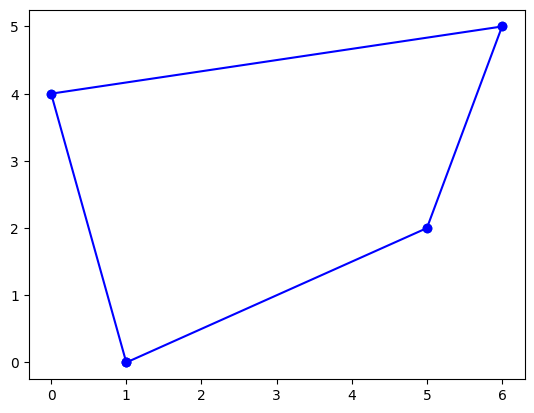

In [10]:
Point.Reset()
Segment.Reset()
rbt = SortedDict()
#Test convex hull
p1 = PointWrap(Point(1,0))
p2 = PointWrap(Point(2,3))
p3 = PointWrap(Point(5,2))
p4 = PointWrap(Point(6,5))
p5 = PointWrap(Point(0,4))

rbt[p1] = None
rbt[p2] = None
rbt[p3] = None
rbt[p4] = None
rbt[p5] = None
#PrintPoints(rbt)
ph = ConvexHullA(rbt)
PrintPoints(ph)
PrintHullA(ph)

## Sweep Line

In [11]:
def GetSegments(polar_hull):
    #polar_hull = SortedDict()
    #for key in convex_hull.keys():
    #    polar_hull[key] = None
    n = len(polar_hull)
    keys = list(polar_hull.keys())
    segments_hull = SortedDict()
    count = 0
    for key in polar_hull.keys():
        next_key = keys[(count + 1) % n]
        s = Segment(key,next_key)
        count+=1
        segments_hull[s.bgn.x] = (s,0)
        segments_hull[s.end.x] = (s,1)
    return segments_hull

In [12]:
def SweepLine(segment_hull_one, segments_hull_two):
    segments_set = segment_hull_one.copy()
    segments_set.update(segments_hull_two)
    scope = SortedDict()
    for key in segments_set.keys():
        #print(key)
        current_segment, end = segments_set[key]
        if not end: #início do segmento
            #print(f"Início do segmento {current_segment.id}")
            comparisons = dict()
            for comparable_segment in scope.keys():
                if key==comparable_segment.end.x:
                    '''do shit'''
                else:
                    aux = (current_segment.bgn.y>comparable_segment.Y_At_X(key))
                    comparisons[comparable_segment] = aux
                    scope[comparable_segment][current_segment] = not aux
            scope[current_segment] = comparisons
            #PrintScope(scope)
            
        else:                          #fim do segmento
            #print(f"Fim do segmento {current_segment.id}")
            if current_segment in scope:
                comparisons = scope[current_segment]
                #PrintScope(scope)
                del scope[current_segment]
                for comparable_segment in scope.keys():
                    if key==comparable_segment.bgn.x:
                        '''do shit'''
                    else:
                        if comparable_segment in comparisons:
                            aux = (current_segment.end.y>comparable_segment.Y_At_X(key))
                            if comparisons[comparable_segment] != aux:
                                #print(f"Inteseção entre {current_segment.id} e {comparable_segment.id}")
                                return True
    return False

## Classification

In [13]:
def Distance(a: Point, b: Point):
    return np.sqrt((a.x-b.x)**2+(a.y-b.y)**2)

def SegFromPointToSeg(p:Point, s:Segment):
    ps_slope = -1/s.slope
    ps_inter = p.y-ps_slope*p.x
    x = (ps_inter-s.intercept)/(s.slope-ps_slope)
    y = ps_slope*x+ps_inter
    if x<s.bgn.x or x>s.end.x:
        return np.inf, None
    intermed_point = Point(x,y)
    d = Distance(p,intermed_point)
    return d, intermed_point

def SegFromPointToSegDev(p:Point, s:Segment):
    ps_slope = -1/s.slope
    ps_inter = p.y-ps_slope*p.x
    xp = np.array([-8.1, 8.1])
    yp = xp*ps_slope+ps_inter
    plt.plot(p.x,p.y,marker='o', color='y')
    plt.plot(xp,yp,color='r')
    xperp = np.array([s.bgn.x,s.end.x])
    yperp = np.array([s.bgn.y,s.end.y])
    plt.plot(xperp,yperp,color='b')
    x = (ps_inter-s.intercept)/(s.slope-ps_slope)
    y = ps_slope*x+ps_inter
    if x<s.bgn.x or x>s.end.x:
        return np.inf, None
    intermed_point = Point(x,y)
    plt.plot(x,y,marker='o',color='g')
    d = Distance(p,intermed_point)
    return d, intermed_point


In [14]:
def Classificator(ph_one, ph_two):
    min = np.inf
    for key in ph_one.keys():
        for kkey in ph_two.keys():
            d = Distance(key,kkey)
            if d<min:
                min = d
                closest_pair = (key,kkey)
    hulls = (ph_one,ph_two)
    distances = SortedDict()
    distances[d] = closest_pair
    #print("closest points: ")
    
    for i in range(2):
        p = closest_pair[i]
        #print(f"Point from hull {i}")
        #print(p)
        next_point_index = (hulls[i].index(p)+1)%len(hulls[i])
        next_point = hulls[i].iloc[next_point_index]
        #print("Next point")
        #print(next_point)
        next_seg = Segment(p,next_point)
        d, intermed_point = SegFromPointToSeg(closest_pair[(i+1)%2],next_seg)
        #print("distance to the closest of another polygon")
        #print(d)
        if d!=np.inf:
            distances[d] = (intermed_point,closest_pair[(i+1)%2])

        prev_point_index = (hulls[i].index(p)-1)%len(hulls[i])
        prev_point = hulls[i].iloc[prev_point_index]
        #print("Previous point")
        #print(prev_point)
        ''''
        Point from hull 1
        6: 5.000001760804929   1.9999966583671591
        
        Previous point
        8: 8.000003952213047   2.999991979966869

        distance to the closest of another polygon
        3.0799045333543653e-06
        '''
        prev_seg = Segment(p,prev_point)
        d, intermed_point = SegFromPointToSeg(closest_pair[(i+1)%2],prev_seg)
        #print("distance to the closest of another polygon")
        #print(d)
        if d!=np.inf:
            distances[d] = (intermed_point,closest_pair[(i+1)%2])

    first_key = distances.peekitem(0)[0]
    ends = distances[first_key]
    #print("Segment")
    s = Segment(ends[0],ends[1])
    #print(s)
    med_p = Point(0.5*(s.bgn.x+s.end.x),0.5*(s.bgn.y+s.end.y))
    slope = -1/s.slope
    intercept = med_p.y-slope*med_p.x

    return slope, intercept

    
    


(inf, None)

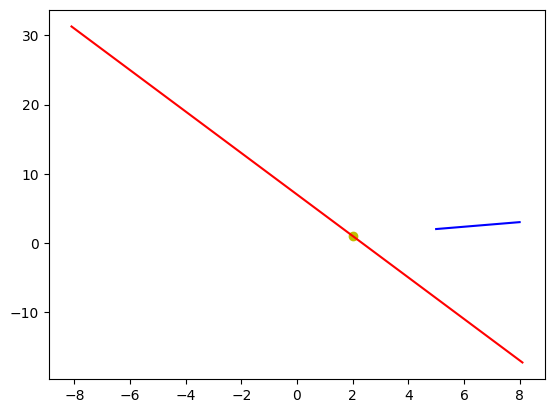

In [15]:
p0 = Point(1.9999963795435443,0.999994640083903,shake=0)
p1 = Point(5.000001760804929,1.9999966583671591,shake=0)
p2 = Point(8.000003952213047,2.999991979966869,shake=0)
SegFromPointToSegDev(p0,Segment(p1,p2))

## Display

## Testing

In [16]:
Point.Reset()
p1 = Point(1,0, shake=0)
p2 = Point(0,2, shake=0)
p3 = Point(2,2, shake=0)
Point.Reset()
polar_set = SortedDict()      #Points are being sorted according to polar coordinate
polar_set[p1] = None
polar_set[p2] = None
polar_set[p3] = None
for key in polar_set.keys():
    print(key)

1: 1.0   0.0
3: 2.0   2.0
2: 0.0   2.0


In [18]:
Segment.Reset()
Point.Reset()
p1 = Point(-1,0)
p2 = Point(1,0)
p3 = Point(-2,1)
p4 = Point(2,1)
p5 = Point(0,3)
pentagon = SortedDict()
pentagon[p1] = None
pentagon[p2] = None
pentagon[p3] = None
pentagon[p4] = None
pentagon[p5] = None
pentagon_seg = GetSegments(pentagon)       #working
for k in pentagon_seg.keys():
    if pentagon_seg[k][1]==0:
        print(pentagon_seg[k][0])
    print("\n")

Id: 4
Begin: -1.9999996220634988   0.9999921692433141
End: -1.0000046267877345   7.711832805239849e-06


Id: 5
Begin: -1.0000046267877345   7.711832805239849e-06
End: 1.0000058351365404   -9.935751625178772e-07










In [19]:
Point.Reset()
p1 = Point(0,2)
p2 = Point(3,0)
p3 = Point(3,3)
triangle = SortedDict()
triangle[p1] = None
triangle[p2] = None
triangle[p3] = None
triangle_seg = GetSegments(triangle)
for k in triangle_seg.keys():
    if triangle_seg[k][1]==0:
        print(triangle_seg[k][0])
    print("\n")


Id: 8
Begin: -4.808546504231963e-06   1.9999963678385464
End: 2.9999976607824705   5.1705012933889925e-06








In [20]:
SweepLine(triangle_seg,pentagon_seg)

False

(1.4142110652275064, <__main__.Point at 0x14a308a0710>)

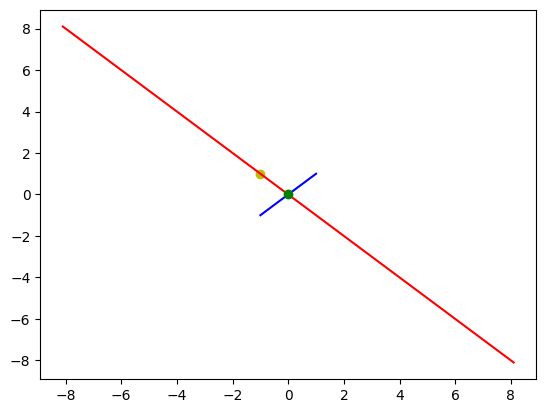

In [21]:
Point.Reset()
p1 = Point(1,1)
p2 = Point(-1,-1)
p0 = Point(-1,1)
s = Segment(p1,p2)
SegFromPointToSegDev(p0, s)

Pentagon:
2: 1.000004705827073   9.797901259337132e-06
4: 2.0000046271782037   1.0000040164985904
5: -1.008389537688099e-06   3.0000040978454687
3: -2.000000707095644   1.0000057469091093
1: -1.0000037777665354   6.51747691238795e-07
Another triangle:
7: 7.9999916003755125   -8.272484204851514e-06
8: 8.000009476602939   2.999999112550859
6: 5.000001183271712   1.9999948686586937


C:\Users\User\AppData\Local\Temp\ipykernel_7392\2115356480.py:19: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_point = hulls[i].iloc[next_point_index]


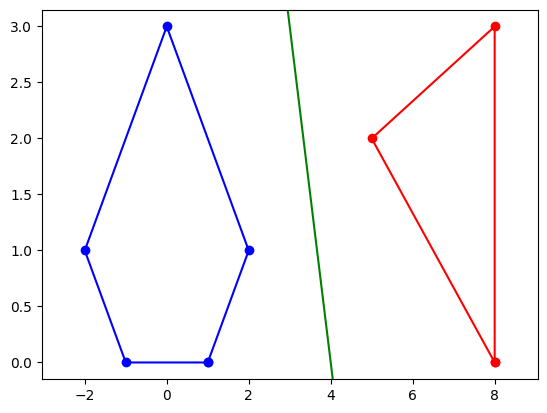

In [22]:
Segment.Reset()
Point.Reset()
p1 = Point(-1,0)
p2 = Point(1,0)
p3 = Point(-2,1)
p4 = Point(2,1)
p5 = Point(0,3)
pentagon = SortedDict()
pentagon[p1] = None
pentagon[p2] = None
pentagon[p3] = None
pentagon[p4] = None
pentagon[p5] = None
p6 = Point(5,2)
p7 = Point(8,0)
p8 = Point(8,3)
another_triangle = SortedDict()
another_triangle[p6] = None
another_triangle[p7] = None
another_triangle[p8] = None
print("Pentagon:")
for k in pentagon.keys():
    print(k)
print("Another triangle:")
for k in another_triangle.keys():
    print(k)
separator = Classificator(pentagon, another_triangle)
another_triangle_seg = GetSegments(another_triangle)
PrintHullsAndSeparator(pentagon, another_triangle,separator)

## Data Load and Modelling

### Obesity Classification(TO-DO)

In [23]:
#Source = https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
obesity_data = pd.read_csv("./dataSets/ObesityDataSet_raw_and_data_sinthetic.csv")

### Iris Classification (Separable)

In [234]:
def ConvexHullADev(points):
    Point.Reset()
    print(len(points))
    for k in points:
        print(f"{k[0]};{k[1]}")
    #max_x = key_list[-1]
    #hull_points = SortedDict()
    polar_hull = SortedDict()
    p0 = Point(points[0][0], points[0][1])
    p1 = Point(points[1][0], points[1][1])
    p2 = Point(points[2][0], points[2][1])
    print("Hull inicial")
    print(p0)
    print(p1)
    print(p2)
    #hull_points[PointWrap(p0)] = None
    #hull_points[PointWrap(p1)] = None
    #hull_points[PointWrap(p2)] = None
    polar_hull[p0] = None
    polar_hull[p1] = None
    polar_hull[p2] = None
    for pp in points[3:]:
        p = Point(pp[0],pp[1])
        polar_hull[p] = None
        n = len(polar_hull)
        index_cclock_comparable = (polar_hull.index(p) + 1) % n
        compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull
        searching_cclock = True


        index_clock_comparable = (polar_hull.index(p) - 1) % n
        compare_clock = polar_hull.iloc[index_clock_comparable]      #first element to search clockwise the vertex that links to p in the old hull
        searching_clock = True
        #PrintKeys(polar_hull) ###
        del polar_hull[p]
        n = len(polar_hull)
        removal = dict()
        #searching for parallel segment counter_clockwise
        print(f"The new point is {p}")
        while searching_cclock:
            index_cclock_comparable = polar_hull.index(compare_cclock)
            print(f"The anchor is {compare_cclock}")
            window = [(index_cclock_comparable-1)%n, (index_cclock_comparable+1)%n]
            seg1 = Segment(polar_hull.iloc[window[1]], compare_cclock, enforce_order=False,shake=1e-5)
            seg2 = Segment(compare_cclock, polar_hull.iloc[window[0]], enforce_order=False,shake=1e-5)
            seg0 = Segment(compare_cclock, p, enforce_order=False, shake=1e-5)
            
            print(f"Segments:\nseg0: {seg0}\nseg1: {seg1}\nseg2{seg2}")
            if Clockwise(seg1,seg0) != Clockwise(seg2,seg0):
                print("Found")
                searching_cclock = False
            else:
                print("Mark to remove:")
                print(compare_cclock)
                removal[compare_cclock] = None
                print("marked")
                compare_cclock = polar_hull.iloc[window[1]]

        #searching for parallel segment clockwise
        while searching_clock:
            index_clock_comparable = polar_hull.index(compare_clock)
            print(f"The anchor is {compare_clock}")
            window = [(index_clock_comparable+1)%n, (index_clock_comparable-1)%n]
            seg1 = Segment(polar_hull.iloc[window[1]], compare_clock, enforce_order=False,shake=1e-5)##
            seg2 = Segment(compare_clock, polar_hull.iloc[window[0]], enforce_order=False,shake=1e-5)##
            seg0 = Segment(compare_clock, p, enforce_order=False,shake=1e-5)
            print(f"Segments:\nseg0: {seg0}\nseg1: {seg1}\nseg2: {seg2}")
            if Clockwise(seg1,seg0) != Clockwise(seg2,seg0):
                print("Found")
                searching_clock = False
            else:
                print("Mark to remove:")
                print(compare_clock)
                removal[compare_clock] = None
                print("marked")
                compare_clock = polar_hull.iloc[window[1]]
        print("removal at end")
        for to_remove in removal:
            print(to_remove)
            PrintKeys(polar_hull)
            del polar_hull[to_remove]
            print("after removal")
            PrintKeys(polar_hull)
    
        polar_hull[p] = None
        #hull_points[p] = None
    return polar_hull

50
1.0;-0.01039062684994388
1.0573303544530686;-0.663299446735817
1.2632975013127123;-0.4684674400276126
1.2969212871083178;-0.6180910365254005
1.3604067783473006;-0.271425401884465
1.370574042981963;-0.06522307895581318
1.400668876120937;-0.7020616904000908
1.4146991874851955;-0.1987995879110962
1.4149639319717517;-0.3462489542807093
1.4404219032118655;0.14790167864403747
1.4771853643829567;0.21575051010414237
1.4799498369651107;-0.3623353243327904
1.4803296555620131;-1.0782993155237406
1.4950046839941877;1.0587712267696576
1.5114378728172055;0.7142060391517215
1.5187085074747677;-0.4302231248794662
1.5263662773171036;0.20661028223890476
1.5276118474041824;-0.008708077844634024
1.536024292954583;0.7077057555875667
1.538158077914;0.9930443609678962
1.5456861580233103;-0.2988436722665346
1.5466758434761516;-0.36670447028499353
1.5597159083154777;0.20443238401604946
1.5688843662923366;0.4784770851904362
1.5755430761394809;0.19747733101528478
1.5824260916138932;-0.23098874133006345
1.5824

C:\Users\User\AppData\Local\Temp\ipykernel_7392\932550875.py:27: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull
C:\Users\User\AppData\Local\Temp\ipykernel_7392\2509321410.py:10: RuntimeWarning: invalid value encountered in scalar divide
  self.slope = (self.end.y-self.bgn.y)/(self.end.x-self.bgn.x)


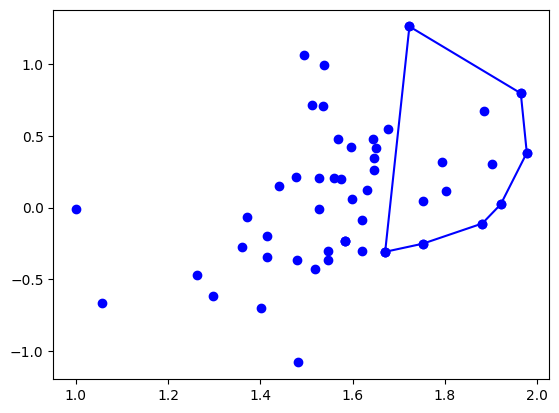

In [235]:
Point.Reset()
Segment.Reset()
iris_data = pd.read_csv("./dataSets/Iris.csv")
iris_data.drop('Id', axis=1, inplace=True)
iris_p_one, iris_p_two = CreateSets(iris_data,'Species')
Translate(iris_p_one,iris_p_two)
iris_ph1 = ConvexHullADev(iris_p_one)
#print("Another hull")
#iris_ph2 = ConvexHullADev(iris_p_two)
#PrintHullsAndPoints(iris_ph1,iris_ph2,iris_p_one,iris_p_two)
PrintHullAndPoint(iris_ph1, iris_p_one)

In [125]:
#PrintWrapped(iris_p_one)
ch1 = ConvexHullADev(iris_p_one)

Initial hull:
Point0:
23: -2.1807649968650398   -0.010379317549872516
Point1:
14: -2.123440731665984   -0.663301864605999
Point2:
43: -1.9174717397320487   -0.4684700594995229
23: -2.1807649968650398   -0.010379317549872516; 
43: -1.9174717397320487   -0.4684700594995229; 
14: -2.123440731665984   -0.663301864605999; 
39: -1.8838622026464007   -0.6180912388371543; 
The new point is 39: -1.8838622026464007   -0.6180912388371543
The anchor is 23: -2.1807649968650398   -0.010379317549872516
Segments:
seg0: Id: 11429
Begin: -2.180764923612002   -0.010370505142874084
End: -1.8838694590234273   -0.618097212263331
seg1: Id: 11427
Begin: -1.9174633938300016   -0.4684734417768847
End: -2.180764923612002   -0.010370505142874084
seg2Id: 11428
Begin: -2.180764923612002   -0.010370505142874084
End: -2.1234336087738046   -0.6632964393497156
Mark to remove:
23: -2.180764923612002   -0.010370505142874084
marked
The anchor is 43: -1.9174633938300016   -0.4684734417768847
Segments:
seg0: Id: 11432
Begin

C:\Users\User\AppData\Local\Temp\ipykernel_7392\3216527334.py:21: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  for p in rb_tree_points.iloc[3:]:
C:\Users\User\AppData\Local\Temp\ipykernel_7392\3216527334.py:25: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull


In [28]:
iris_data.iloc[:,-1].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [29]:
pca = PCA(2)
data = pca.fit_transform(iris_data.iloc[:,:-1])
label_orig = iris_data.iloc[:,-1]

In [30]:
label = (label_orig != 'Iris-setosa').astype(int)
label.value_counts()

Species
1    100
0     50
Name: count, dtype: int64

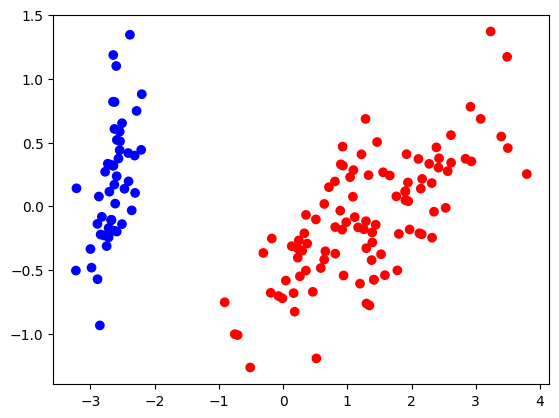

In [31]:
color = ['red' if l == 1 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1],color=color)
plt.show()

### Spam classification (Non Separable)

In [32]:
#Source = https://archive.ics.uci.edu/dataset/94/spambase
spambase_data = pd.read_csv("./dataSets/spambase/spambase.data",header=None)
pca = PCA(2)
data = pca.fit_transform(spambase_data.iloc[:,:-1])
label = spambase_data.iloc[:,-1]

In [33]:
#Duas Classes
label.value_counts()

57
0    2788
1    1813
Name: count, dtype: int64

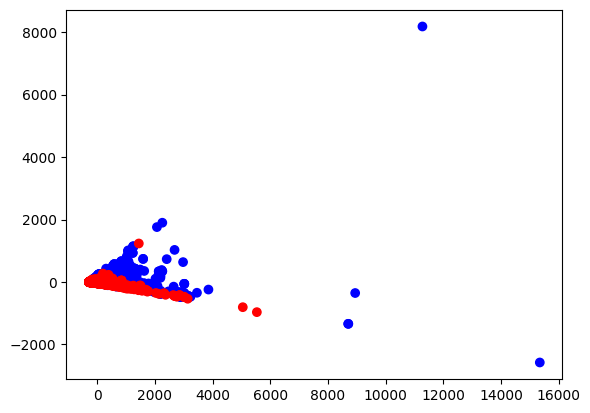

In [34]:
color = ['red' if l == 0 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1],color=color)

### Haberman (Non Separable)

In [35]:
#Source = https://archive.ics.uci.edu/dataset/43/haberman+s+survival
haberman = pd.read_csv("./dataSets/haberman+s+survival/haberman.data",header=None)
pca = PCA(2)
data = pca.fit_transform(haberman.iloc[:,:-1])
label = haberman.iloc[:,-1]

In [36]:
#Duas classes
label.value_counts()

3
1    225
2     81
Name: count, dtype: int64

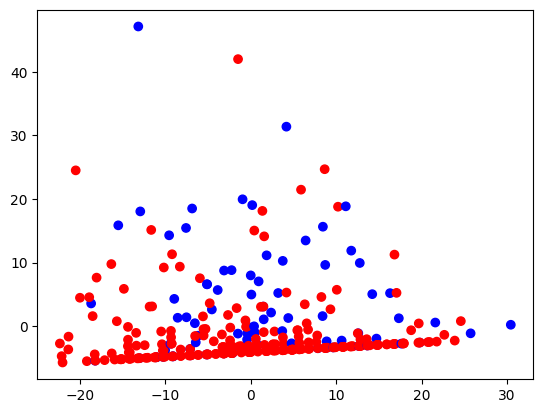

In [37]:
color = ['red' if l == 1 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1], color=color)
plt.show()

### Pen Writing Recognition (Non Separable)

In [38]:
#Source = https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits
pen_recog_training = pd.read_csv("./dataSets/pen+based+recognition+of+handwritten+digits/pendigits.tra",header=None)
pen_recog_test = pd.read_csv("./dataSets/pen+based+recognition+of+handwritten+digits/pendigits.tes",header=None)
pen_recog = pd.concat([pen_recog_training,pen_recog_test],axis=0)

In [39]:
pca = PCA(2)
data = pca.fit_transform(pen_recog.iloc[:,:-1])
label_orig = pen_recog.iloc[:,-1]

In [40]:
#Dez classes
label_orig.value_counts()

16
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

In [41]:
#Convertida para duas (Se o dígito escrito for menor que 5)
label = (label_orig < 9).astype(int)
label.value_counts()

16
1    9937
0    1055
Name: count, dtype: int64

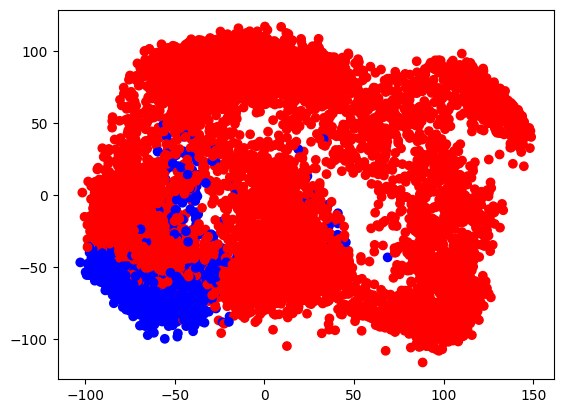

In [42]:
color = ['red' if l == 1 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1], color=color)
plt.show()

### Magic

In [43]:
#Source = https://archive.ics.uci.edu/dataset/110/yeast
#Tive que fazer algumas modificações no arquivo direto no excel para mudar a delimitação do arquivo csv e alinhar algumas linhas que não estavam alinhadas com as colunas
magic = pd.read_csv("./dataSets/tic-tac-toe.prepared.txt",sep=",")

In [44]:
magic.iloc[:,-1].value_counts()

Class
positive    626
negative    332
Name: count, dtype: int64

In [45]:
pca = PCA(2)
data = pca.fit_transform(magic.iloc[:,:-1])
label = magic.iloc[:,-1]

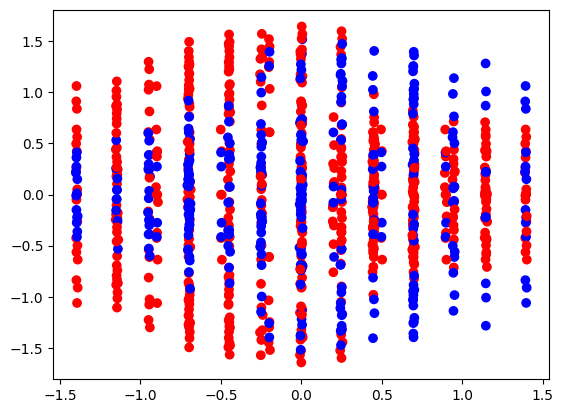

In [46]:
color = ['red' if l == 'positive' else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1],color=color)

### Balance (Separable)

In [47]:
#Source = https://sci2s.ugr.es/keel/dataset.php?cod=54
balance = pd.read_csv("./dataSets/balance.dat.csv",header=None)

In [48]:
balance.iloc[:,-1].value_counts()

4
 R    288
 L    288
 B     49
Name: count, dtype: int64

In [49]:
pca = PCA(2)
data = pca.fit_transform(balance.iloc[:,:-1])
label_orig = balance.iloc[:,-1]

In [50]:
label_orig.value_counts()

4
 R    288
 L    288
 B     49
Name: count, dtype: int64

In [51]:
label = (label_orig != ' L').astype(int)
label.value_counts()

4
1    337
0    288
Name: count, dtype: int64

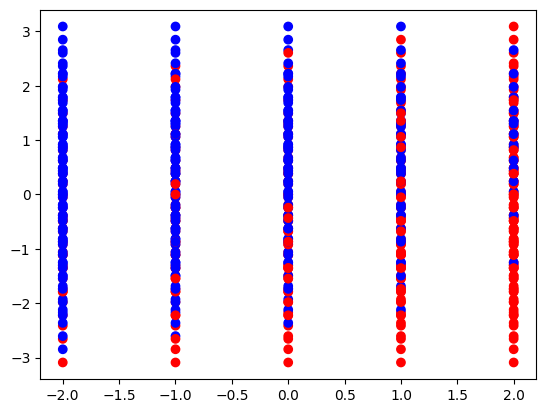

In [52]:
color = ['red' if l == 1 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1],color=color)
plt.show()

### Hayes Roth (TO-DO)

In [53]:
#Source = https://sci2s.ugr.es/keel/dataset.php?cod=186
hayes_r = pd.read_csv("./dataSets/hayes-roth.dat",header=None,sep=",")

### Titanic Survival (TO-DO)

In [54]:
#Source = https://sci2s.ugr.es/keel/dataset.php?cod=189
titanic = pd.read_csv("./dataSets/titanic.dat",header=None,sep=",")

In [55]:
titanic

,0,1,2,3
0,-1.8700,-0.228,0.521,-1.0
1,-0.9230,-0.228,-1.920,1.0
2,-0.9230,-0.228,-1.920,1.0
3,0.9650,-0.228,0.521,1.0
4,0.0214,-0.228,0.521,-1.0
...,...,...,...,...
2196,0.9650,-0.228,0.521,-1.0
2197,-0.9230,-0.228,0.521,-1.0
2198,-1.8700,-0.228,0.521,-1.0
2199,0.9650,-0.228,0.521,-1.0


In [56]:
# Retirada a classe 2 para que fique linearmente separável
pca = PCA(2)
data = pca.fit_transform(titanic.iloc[:,:-1])
label = titanic.iloc[:,-1]


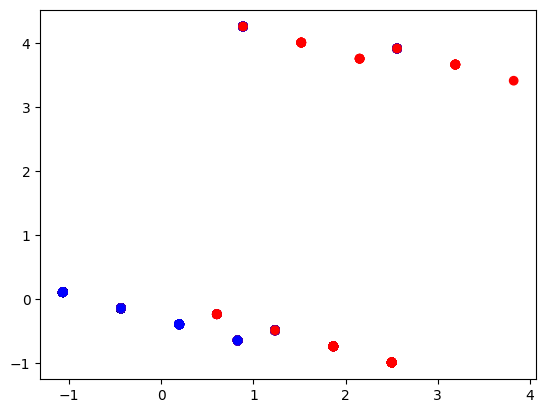

In [57]:
color = ['red' if l == 1 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1], color=color)
plt.show()

### Wine classification

In [58]:
wine = pd.read_csv("./dataSets/wine.prepared.txt",sep=",")

In [59]:
wine["Class"].value_counts()
top_two_classes = wine['Class'].value_counts().index[:2]
top_two_classes
wine = wine[wine['Class'].isin(top_two_classes)]
wine.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [60]:
# Retirada a classe 2 para que fique linearmente separável
wine = wine[wine['Class'] != 2]
pca = PCA(2)
data = pca.fit_transform(wine.iloc[:,:-1])
label = wine.iloc[:,-1]

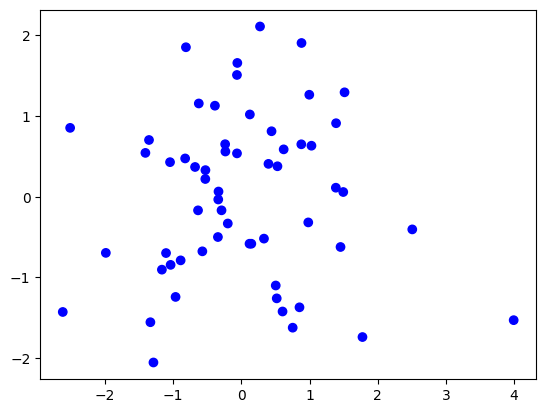

In [61]:
color = ['red' if l == 3 else 'blue' for l in label]
plt.scatter(data[:,0],data[:,1], color=color)
plt.show()

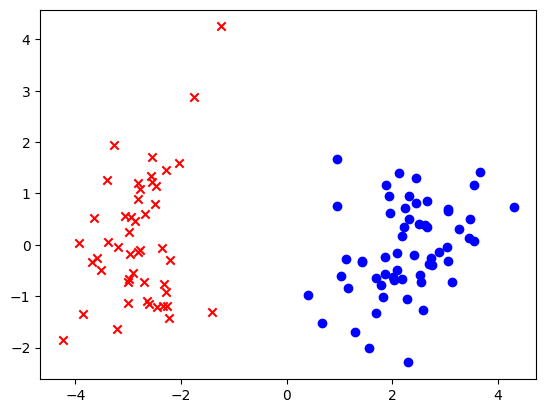

In [62]:
wine = pd.read_csv("./dataSets/wine.prepared.txt",sep=",")
p1, p2 = CreateSets(wine, 'Class', L = [1,2])
PrintSets(p1,p2)

C:\Users\User\AppData\Local\Temp\ipykernel_7392\4257720459.py:18: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull


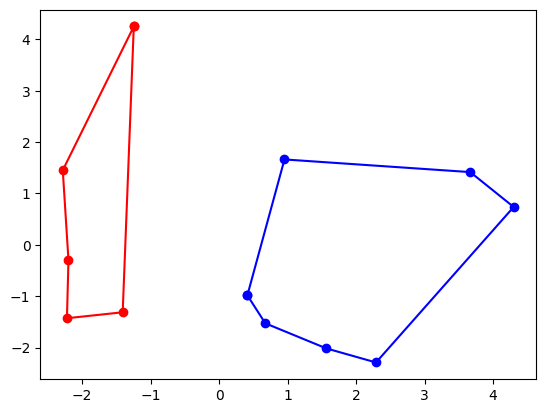

In [63]:
ph1 = ConvexHullA(p1)
ph2 = ConvexHullA(p2)
PrintHulls(ph1,ph2)

In [64]:
s1 = GetSegments(ph1)
s2 = GetSegments(ph2)
SweepLine(s1,s2)

False

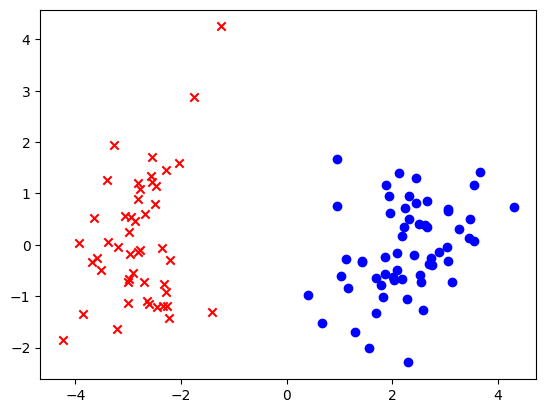

In [65]:
p1, p2 = CreateSets(wine, 'Class', L = [1,2])
PrintSets(p1,p2)

## Model Definition

In [66]:
class Geometric_Classificator:
    def __init__(self):
        self.hulls = list()

    def fit(self, x_train, y_train):
        #Point.Reset()
        #Segment.Reset()
        #Buid the convex hull to each label
        for label in set(y_train):
            set_coord = x_train[y_train == label]
            rbt = SortedDict()
            #Transform all register in the class Point
            set_points = np.apply_along_axis(lambda x: Point(x[0],x[1]), axis = 1, arr = set_coord)
            for p in set_points:
                rbt[PointWrap(p)] = None
            self.hulls.append([label,ConvexHullA(rbt)])
            rbt.clear()
        
        #Apply SweepLine in both Hulls to check for intersections
        hulls_segment = [GetSegments(self.hulls[i][1]) for i in range(2)]
        
        if(SweepLine(hulls_segment[0],hulls_segment[1])):
            print("Data is linear separable")
        else:
            print("Data is not linear separable")
            return False
        
        self.slope, self.intersect = Classificator(self.hulls[0][1], self.hulls[1][1])
        return    

In [67]:
gc = Geometric_Classificator()

In [68]:
gc.fit(data,label)

C:\Users\User\AppData\Local\Temp\ipykernel_7392\4257720459.py:18: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  compare_cclock = polar_hull.iloc[index_cclock_comparable]   #first element to search counter-clockwise the vertex that links to p in the old hull


ValueError: <__main__.Point object at 0x0000014A34EC6990> is not in list

In [ ]:
#hulls_segment = [GetSegments(gc.hulls[l]) for l in gc.hulls.keys()]
#SweepLine(hulls_segment[0],hulls_segment[1])

True

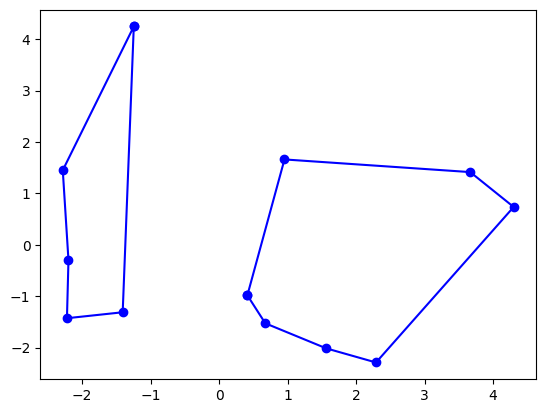

In [ ]:
PrintHullA(gc.hulls[0][1])
PrintHullA(gc.hulls[1][1])